<a href="https://colab.research.google.com/github/soph-loaf/aht_project/blob/main/ReadingDataFromWundergound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sophia Ladyzhets, sal2213

Partner: Sally Green

## Reading Data from Wunderground

### Objective:

Scrape data from Weather Underground webpages and make scatterplots of temperature readings taken at different weather stations over defined time intervals.

In [1]:
import requests
import pandas as pd
import numpy as np
import math

In [132]:
url = 'https://www.wunderground.com/dashboard/pws/KILDALTO3/table/2018-06-01/2018-06-01/daily'

#get the url from rweather
rweather = requests.get(url)

#read the content from the website into an html
html = rweather.content

#read the content from the html into a pandas dataframe
htmldf = pd.read_html(html)

#print the dataframe
# htmldf[-1]


In [134]:
# start_date = '2018-06-01'
start_date = '2018-10-24'
# end_data = '2021-09-30'
end_date = '2018-10-27'
station = 'KILDALTO3'
station = 'KILWELDO6' # Only data from June 1, 2021. Otherwise trying from 2018 June 1.
station = 'KILMOUNT18'


#note: something went wrong on 2018-10-28, trying range from 2018-10-24 to 2018-10-27
date_range = pd.date_range(start=start_date, end=end_date)
weatherdata = pd.DataFrame()

try:
    for dates in date_range:
        #print(str(dates.date()))
        url = 'https://www.wunderground.com/dashboard/pws/'+station+'/table/'+str(dates.date())+'/'+str(dates.date())+'/daily'
        #print(url)

        rweather = requests.get(url)
        html = rweather.content
        htmldf = pd.read_html(html)
        wdata = htmldf[-1]
        wdata['Date'] = dates.date() 
        weatherdata = weatherdata.append(wdata)
    
except:
    print('something went wrong on ' + str(dates.date()))

weatherdata.dropna(thresh=5)
weatherdata.to_csv(station+'_wunderground_'+start_date+'_'+str(dates.date())+'.csv', index=False)

In [2]:
def read_data_from_wu (station, start_date, end_date):
    date_range = pd.date_range(start=start_date, end=end_date)
    weatherdata = pd.DataFrame()
    
    try:
        for dates in date_range:
            #print(str(dates.date()))
            url = 'https://www.wunderground.com/dashboard/pws/'+station+'/table/'+str(dates.date())+'/'+str(dates.date())+'/daily'
            rweather = requests.get(url)
            html = rweather.content
            htmldf = pd.read_html(html)
            wdata = htmldf[-1]
            wdata['Date'] = dates.date() 
            weatherdata = weatherdata.append(wdata)
        
    except:
        print('something went wrong on ' + str(dates.date()))

    weatherdata.dropna(thresh=5)
    weatherdata.to_csv(station+'_wunderground_'+start_date+'_'+str(dates.date())+'.csv', index=False)

    return weatherdata

In [37]:
# read_data_from_wu('KNYNEWYO343', '2021-07-01', '2021-07-07')
# read_data_from_wu('KNYNEWYO1421', '2021-07-01', '2021-07-07')
# read_data_from_wu('KNYNEWYO1335', start_date='2021-07-01', end_date='2021-07-07')   ##no data (all empty :/)
read_data_from_wu('KNYNEWYO1238', start_date='2021-07-01', end_date='2021-07-07')


In [ ]:
data_343 = pd.read_csv('../aht_project/KNYNEWYO343_wunderground_2021-07-01_2021-07-07.csv')
data_1421 = pd.read_csv('../aht_project/KNYNEWYO1421_wunderground_2021-07-01_2021-07-07.csv')

# data_343.head()
# data_1421.head()

In [ ]:
from datetime import datetime
from matplotlib import pyplot as plt, dates as mdates

def conv_temp(temperature):
    #temperature processing:
    #setting nan values to zero and converting strings to floats
    T = temperature
    for i in range(len(T)):
        if type(T[i]) == str:
            T[i] = T[i][:-3]
        elif math.isnan(T[i]) == True:
            T[i] = 0
        else:
            T[i] = T[i]

    for j in range(len(T)):
        T[j] = float(T[j])

    return T


# dates = list(weatherdata['Date'])
# # dates1 = ["01/02/2021", "01/03/2021", "01/04/2021", "01/05/2021", "01/06/2021", ]
# # [datetime.strptime(d, "%m/%d/%Y").date() for d in dates1]
# time = weatherdata['Time']
# temp = list(weatherdata['Temperature'])

x_343 = list(data_343['Date'])
x_1421 = list(data_1421['Date'])

T_343 = conv_temp(list(data_343['Temperature']))
T_1421 = conv_temp(list(data_1421['Temperature']))



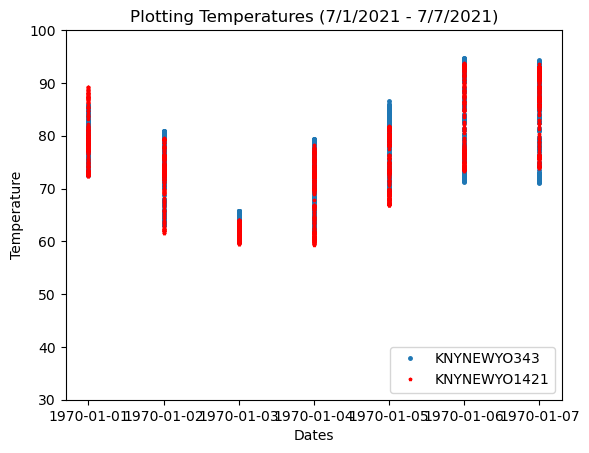

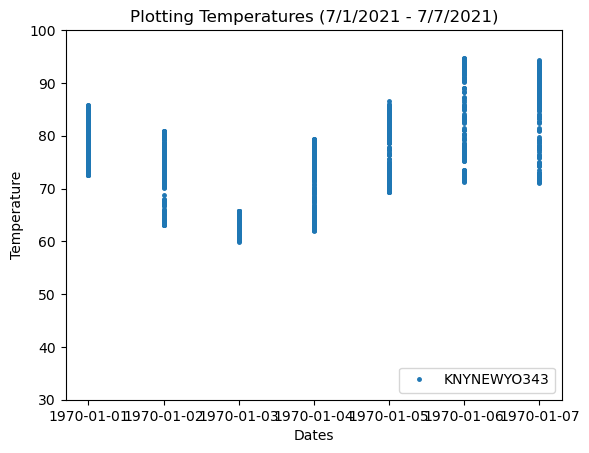

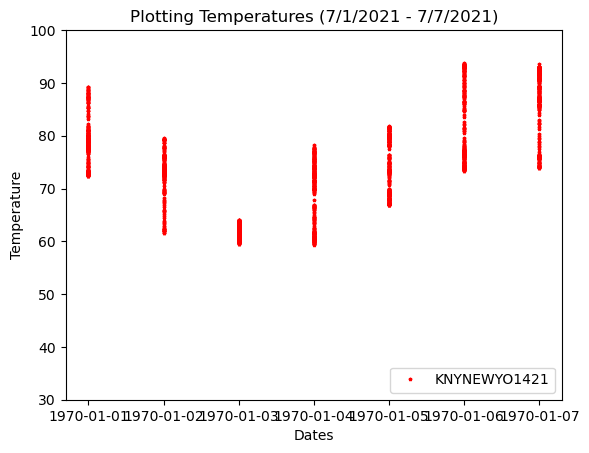

In [35]:
#making a scatter plot while omitting nan values
#defined custom y-range in order to avoid plotting zeroes
fig = plt.figure()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.plot(x_343, T_343, 'o', markersize=2.5, label='KNYNEWYO343')
ax.plot(x_1421, T_1421, '*r', markersize=2.5, label='KNYNEWYO1421')
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature")
ax.set_ylim([30.0, 100.0])
ax.set_title('Plotting Temperatures (7/1/2021 - 7/7/2021)')
plt.legend(loc='lower right')
plt.show()

#making a scatter plot while omitting nan values
#defined custom y-range in order to avoid plotting zeroes
fig = plt.figure()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.plot(x_343, T_343, 'o', markersize=2.5, label='KNYNEWYO343')
# ax.plot(x_1421, T_1421, '*', markersize=2.5, label='KNYNEWYO1421')
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature")
ax.set_ylim([30.0, 100.0])
ax.set_title('Plotting Temperatures (7/1/2021 - 7/7/2021)')
plt.legend(loc='lower right')
plt.show()

#making a scatter plot while omitting nan values
#defined custom y-range in order to avoid plotting zeroes
fig = plt.figure()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())
# ax.plot(x_343, T_343, 'o', markersize=2.5, label='KNYNEWYO343')
ax.plot(x_1421, T_1421, '*r', markersize=2.5, label='KNYNEWYO1421')
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature")
ax.set_ylim([30.0, 100.0])
ax.set_title('Plotting Temperatures (7/1/2021 - 7/7/2021)')
plt.legend(loc='lower right')
plt.show()

In [140]:
from datetime import datetime
from matplotlib import pyplot as plt, dates as mdates

#dates processing:

dates = list(weatherdata['Date'])
# dates1 = ["01/02/2021", "01/03/2021", "01/04/2021", "01/05/2021", "01/06/2021", ]
# [datetime.strptime(d, "%m/%d/%Y").date() for d in dates1]
time = weatherdata['Time']
temp = list(weatherdata['Temperature'])


#temperature processing:

#setting nan values to zero and converting strings to floats
for i in range(len(temp)):
    if type(temp[i]) == str:
        temp[i] = temp[i][:-3]
    elif math.isnan(temp[i]) == True:
        temp[i] = 0
    else:
        temp[i] = temp[i]

for j in range(len(temp)):
    temp[j] = float(temp[j])

x = dates
y = temp


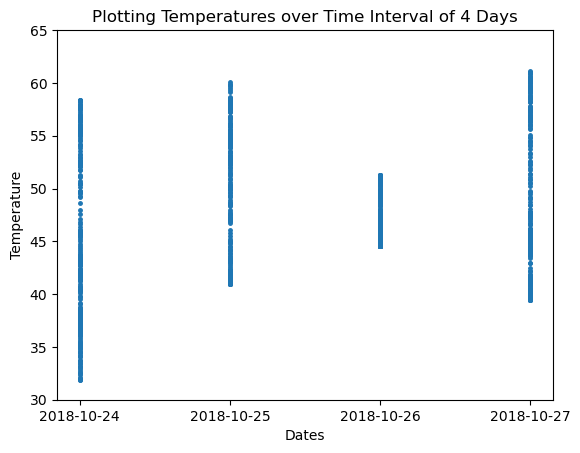

In [141]:
#making a scatter plot while omitting nan values
#defined custom y-range in order to avoid plotting zeroes
fig = plt.figure()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.plot(x, y, 'o', markersize=2.5)
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature")
ax.set_ylim([30.0, 65.0])
ax.set_title('Plotting Temperatures over Time Interval of 4 Days')
plt.show()
